# TARRAGONA DATATHON, November 2018
## team_10 activities

*   Marianna Polini: Data Scientist / SQL-Databases
*   Christian Villavicencio: Clinician
*   Eva Machado: Clinician
*   Raquel Carbonell: Clinician
*   Diana Gil: Clinician
*   Laia Labad: Clinician
*   Santiago Frias: Data Scientist / Statistics-Models



## Septic Shock query and stay time representation

In [36]:
# Importacion Librerias
import numpy
print('numpy Version: ',numpy.__version__)
import os
import pandas
print('Pandas Version: ',pandas.__version__)
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.figsize']= [20,12]
import matplotlib.patches as patches
import matplotlib.path as path
import tensorflow
print('tensorflow Version: ',tensorflow.__version__)
# Visualización Dataframes
from IPython.display import display, HTML

# Acceso repositorio datos Datathon.
from google.colab import auth
from google.cloud import bigquery

('numpy Version: ', '1.14.6')
('Pandas Version: ', u'0.22.0')
('tensorflow Version: ', '1.12.0')


In [0]:
# Autentificacion BigQuery, generacion resumen verificacion a pegar despues de validacion.
auth.authenticate_user()

In [0]:
# Hosting solo lectura proyecto datathon-tarragona-2018
# Creado proyecto compartido team_10 asignado en este kernel
project_id='datathon-tarragona-2018'
os.environ["GOOGLE_CLOUD_PROJECT"]=project_id

In [0]:
# Asignar configuracion de la ejecucion de sentencias SQL en BigQuery
def run_query(query):
  return pandas.io.gbq.read_gbq(query, project_id=project_id, verbose=True, configuration={'query':{'useLegacySql': True}})

# Crude Data

In [0]:
consulta = run_query("SELECT patientunitstayid,activeupondischarge,diagnosisoffset FROM [physionet-data:eicu_crd.diagnosis] WHERE LOWER(diagnosisstring) LIKE '%septic shock%' ORDER BY patientunitstayid,activeupondischarge, diagnosisoffset")

In [41]:
consulta

,patientunitstayid,activeupondischarge,diagnosisoffset
0,141515,False,134
1,141515,False,2418
2,141515,False,3346
3,141515,True,3870
4,141751,False,45
5,141751,True,460
6,141959,True,219
7,142483,False,1363
8,142483,False,1741
9,142483,False,21476


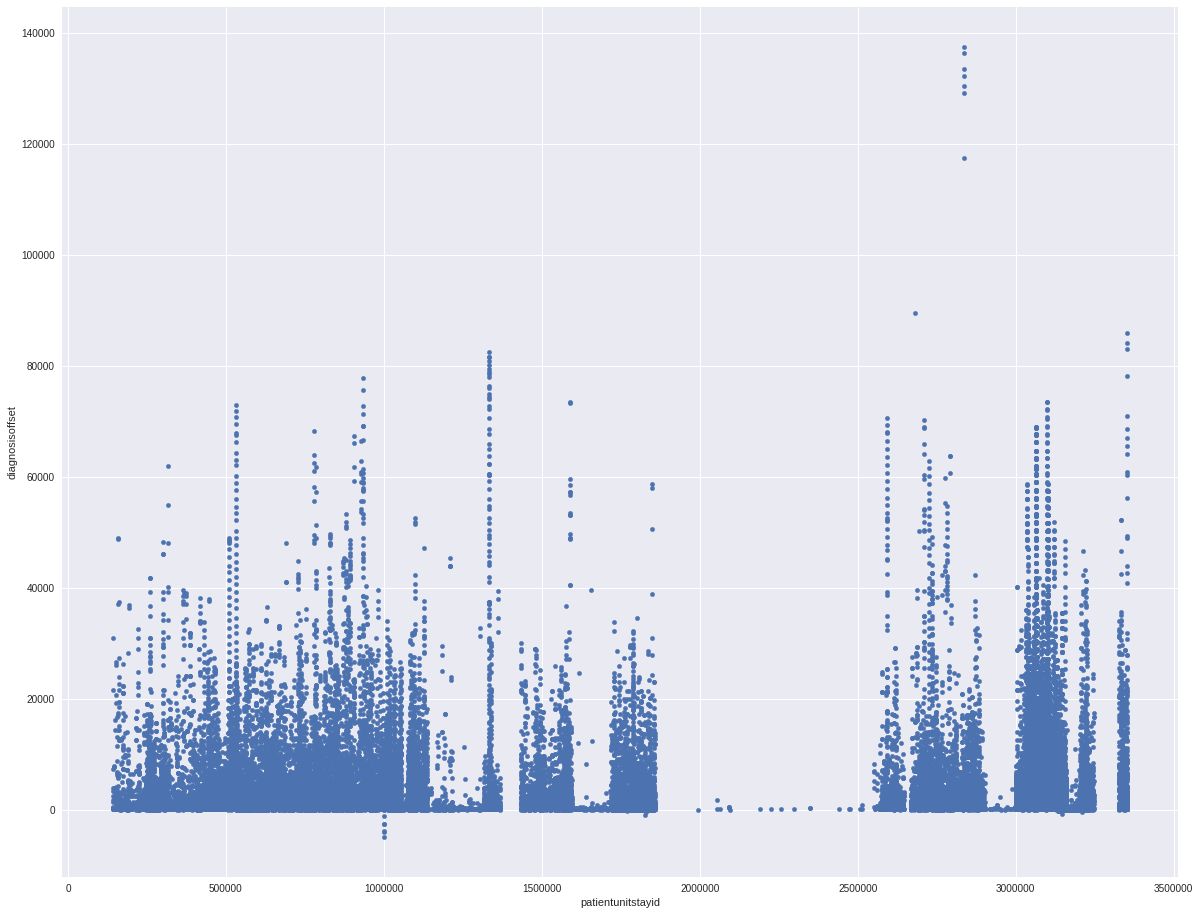

In [42]:
# Scatter Plot de correlacion entre eje x, eje y, de ejemplo crude data
consulta.plot(figsize = [20,16], kind='scatter',x='patientunitstayid',y='diagnosisoffset' )

# Data for patients registered on Septic Shock Diag with almost near of 3 days

In [0]:
consulta = run_query("SELECT patientunitstayid,activeupondischarge,diagnosisoffset FROM [physionet-data:eicu_crd.diagnosis] WHERE LOWER(diagnosisstring) LIKE '%septic shock%' AND diagnosisoffset > 4000 ORDER BY patientunitstayid,activeupondischarge,diagnosisoffset")

In [44]:
consulta

,patientunitstayid,activeupondischarge,diagnosisoffset
0,142483,False,21476
1,142483,True,30971
2,143466,True,7279
3,145394,False,7670
4,145394,True,7671
5,146349,False,7858
6,148182,False,14361
7,148182,True,16201
8,151023,True,4057
9,153170,False,19286


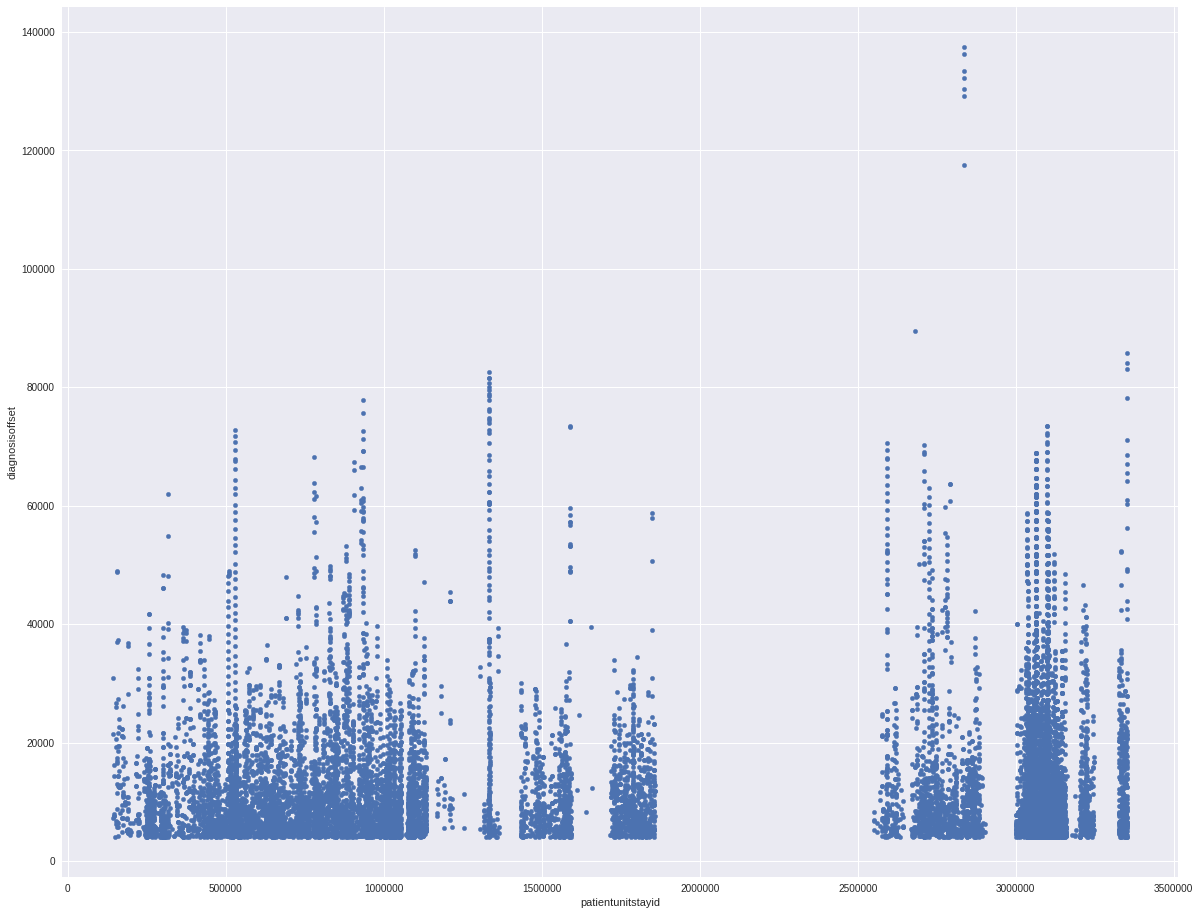

In [45]:
# Scatter Plot de correlacion entre eje x, eje y, eliminados pacientes de los que no tenemos datos de tres dias
consulta.plot(figsize = [20,16], kind='scatter',x='patientunitstayid',y='diagnosisoffset' )

# Number of unique id's to profile  load balancing

In [0]:
consulta = run_query("SELECT patientunitstayid FROM [physionet-data:eicu_crd.diagnosis] WHERE LOWER(diagnosisstring) LIKE '%septic shock%' AND diagnosisoffset > 4000 GROUP BY patientunitstayid  ORDER BY patientunitstayid")


In [47]:
consulta

,patientunitstayid
0,142483
1,143466
2,145394
3,146349
4,148182
5,151023
6,153170
7,154134
8,155503
9,156476


# Intake Output Balance events to calculate overload. Crude Data.

In [0]:
consulta = run_query("SELECT patientunitstayid,nettotal,intakeoutputentryoffset FROM [physionet-data:eicu_crd.intakeoutput] ORDER BY patientunitstayid")

In [49]:
consulta

,patientunitstayid,nettotal,intakeoutputentryoffset
0,141168,1075.00,1746
1,141168,540.00,1129
2,141168,1075.00,1746
3,141168,993.00,2346
4,141168,0.00,1066
5,141168,0.00,25
6,141168,500.00,546
7,141168,0.00,895
8,141168,0.00,25
9,141168,993.00,2346


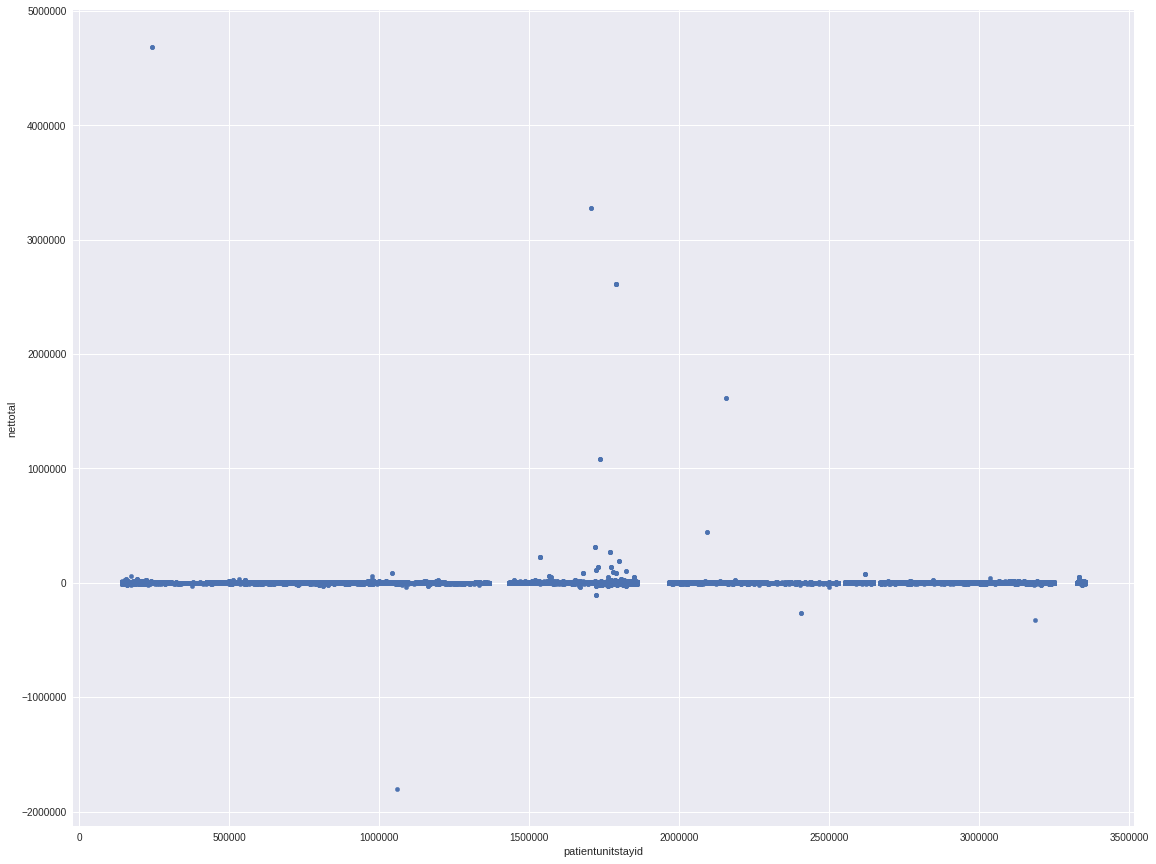

In [50]:
# Scatter Plot exploratorio para detectar eventos con valores imposibles a eliminar.
consulta.plot(figsize = [19,15], kind='scatter',x='patientunitstayid',y='nettotal' )

# Intake Output Balance events to calculate overload. Cleaned Data

In [0]:
consulta = run_query("SELECT f.patientunitstayid , f.nettotal, f.intakeoutputentryoffset FROM [physionet-data:eicu_crd.intakeoutput] AS f WHERE (f.nettotal < 5000) AND (f.nettotal > -5000) ORDER BY f.patientunitstayid, f.intakeoutputentryoffset") 

In [52]:
consulta

,f_patientunitstayid,f_nettotal,f_intakeoutputentryoffset
0,141168,0.00,25
1,141168,0.00,25
2,141168,500.00,546
3,141168,500.00,546
4,141168,500.00,706
5,141168,0.00,895
6,141168,0.00,1066
7,141168,540.00,1129
8,141168,0.00,1146
9,141168,0.00,1146


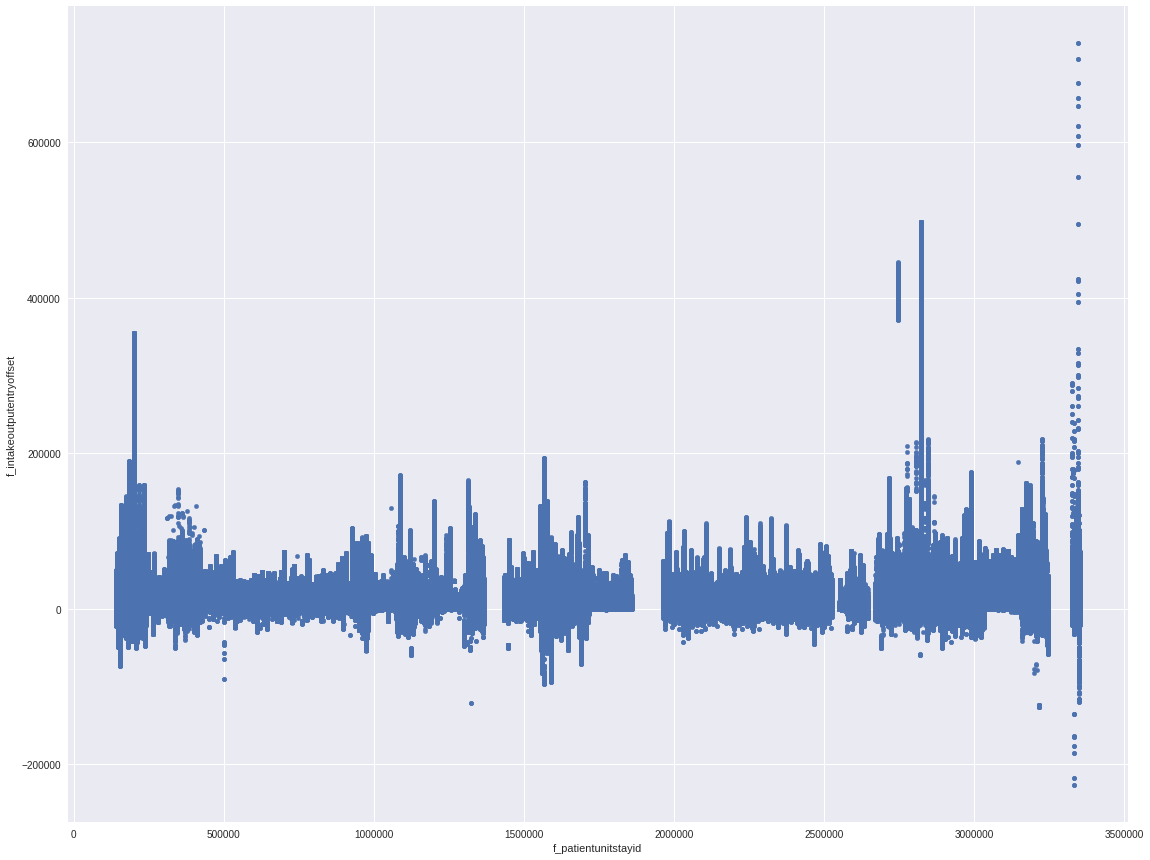

In [53]:
# Scatter Plot exploratorio de la topologia del balance de fluidos por estancia del paciente
consulta.plot(figsize = [19,15], kind='scatter',x='f_patientunitstayid',y='f_intakeoutputentryoffset' )